## Packages

In [1]:
import os
import itertools

In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
from skimage.feature import greycomatrix , greycoprops
from skimage.io import imread
from skimage import img_as_ubyte

## Functions

In [6]:
def is_jpg(file):
    extention = file.split(sep=".")[-1]
    return file if extention == "jpg" else None

In [7]:
def filter_jpgs(files):
    '''
    return jpgs files and ignore non jpgs

    Parameters:
            (files): array of file names

    Returns:
            (filtered_files):  jpgs files only 
    '''
    filtered_files = [file for file in files if is_jpg(file)]
    return filtered_files

In [8]:
def images_paths(dataset_folder):
    '''
    return list of all images paths from each folder In This dataset 

    Parameters:
            (dataset_folder): Main Folder For This dataset

    Returns:
            (images_paths): np array contains every path for every image.

    '''
    existing_folders = sorted(os.listdir(f'{dataset_folder}'))
    print(f'Existing Folders Or Labels are: {", ".join(existing_folders)}')
    
    paths_dict = {folder : sorted(os.listdir(f'{path}/{folder}')) for folder in existing_folders } # { folder : its_images }
    print(f'First Folder is: { list(paths_dict.keys())[0] }, Its First Two Images: { list(paths_dict.values())[0][:2] } :')
    
    images_paths = np.array([], dtype = str)
    
    for folder , files in paths_dict.items():
        cur_folder_paths = [f'{dataset_folder}/{folder}/{file}' for file in files if is_jpg(file) ]
        images_paths = np.concatenate( (images_paths, cur_folder_paths), axis=0 )
    
    return images_paths

In [9]:
def images_labels(dataset_folder):
    '''
    return list of all labels In This dataset 

    Parameters:
            (dataset_folder): Main Folder For This dataset

    Returns:
            (images_labels): np array contains every label for every image
    '''
    data_folders = sorted(os.listdir(f'{dataset_folder}'))
    
    labels = np.array([], dtype = np.uint8)

    for i,folder in enumerate(data_folders):
        images = filter_jpgs( sorted(os.listdir(f'{path}/{folder}') ) )
        cur_labels = np.full( len(images) , i)
        labels = np.concatenate( (labels, cur_labels)  , axis = 0 )
        
    return labels

In [10]:
def features_extraction(image):
    grey_img = imread(image , as_gray=True)
    ubyte_img = img_as_ubyte(grey_img)
    
    features = []
    distances = [1,3,5]
    angels = [0 , np.pi/4 , np.pi/2]
    
    combinations = list(itertools.product(distances, angels))

    for distance , angel in combinations:
        
        comatrix = greycomatrix(ubyte_img,[distance], [angel], 256, symmetric=True, normed=True)

        contrast= greycoprops(comatrix, 'contrast')[0][0]
        energy= greycoprops(comatrix, 'energy')[0][0]
        homogeneity= greycoprops(comatrix, 'homogeneity')[0][0]
        dissimilarity= greycoprops(comatrix, 'dissimilarity')[0][0]
        correlation=greycoprops(comatrix, 'correlation')[0][0]
        
        features.append(contrast)
        features.append(energy)
        features.append(homogeneity)
        features.append(dissimilarity)
        features.append(correlation)

    return features

In [12]:
def KNN(train_features, test_features, train_labels):
    """
        return predicted lablels to be compared with the test label
    """
    knn = KNeighborsClassifier(10, metric='euclidean')
    knn.fit(train_features, train_labels)  # fit train data
    prediction = knn.predict(test_features)  # test data
    return prediction

## Loading Data

In [13]:
path = './FMD/image'

In [14]:
images_paths = images_paths(path)
images_labels = images_labels(path)

Existing Folders Or Labels are: fabric, foliage, glass, leather, metal, paper, plastic, stone, water, wood
First Folder is: fabric, Its First Two Images: ['A.jpgest.rtf', 'fabric_moderate_001_new.jpg'] :


In [15]:
images_paths[:10]

array(['./FMD/image/fabric/fabric_moderate_001_new.jpg',
       './FMD/image/fabric/fabric_moderate_002_new.jpg',
       './FMD/image/fabric/fabric_moderate_003_new.jpg',
       './FMD/image/fabric/fabric_moderate_004_new.jpg',
       './FMD/image/fabric/fabric_moderate_005_new.jpg',
       './FMD/image/fabric/fabric_moderate_006_new.jpg',
       './FMD/image/fabric/fabric_moderate_007_new.jpg',
       './FMD/image/fabric/fabric_moderate_008_new.jpg',
       './FMD/image/fabric/fabric_moderate_009_new.jpg',
       './FMD/image/fabric/fabric_moderate_010_new.jpg'], dtype='<U48')

In [16]:
images_labels[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
len(images_paths) == len(images_labels)

True

### Feature Extraction

In [18]:
features = np.array( [features_extraction(path) for path in images_paths] )

In [19]:
features[:2]

array([[3.77720661e+02, 1.04789788e-02, 8.92870990e-02, 1.41099713e+01,
        9.46825750e-01, 9.28953115e+02, 8.15351421e-03, 5.53279701e-02,
        2.25460291e+01, 8.69264673e-01, 7.25395765e+02, 8.44423436e-03,
        5.88876933e-02, 2.03269215e+01, 8.97878203e-01, 1.46397878e+03,
        7.32718056e-03, 4.35049765e-02, 2.87038771e+01, 7.94067345e-01,
        1.81709425e+03, 6.90594736e-03, 3.88204954e-02, 3.20157119e+01,
        7.44391379e-01, 2.36761530e+03, 6.35529080e-03, 3.01648135e-02,
        3.74787053e+01, 6.66763349e-01, 2.37087548e+03, 6.46408835e-03,
        3.27635661e-02, 3.70974534e+01, 6.66777094e-01, 2.97613316e+03,
        6.14402824e-03, 2.82524762e-02, 4.16031807e+01, 5.81859483e-01,
        2.99143446e+03, 6.09445717e-03, 2.69982857e-02, 4.19266676e+01,
        5.79249480e-01],
       [2.09584455e+01, 3.32863484e-02, 5.12603565e-01, 2.06974682e+00,
        9.96769163e-01, 5.26352516e+01, 2.80158007e-02, 4.07909846e-01,
        3.18355449e+00, 9.91885530e-01,

In [20]:
features[200:202]

array([[2.13999847e+02, 7.55581422e-02, 6.12895558e-01, 3.64582314e+00,
        9.65522117e-01, 2.47790796e+02, 7.29514179e-02, 5.68049535e-01,
        4.12040079e+00, 9.60069600e-01, 4.45741678e+01, 8.32586922e-02,
        7.56580891e-01, 1.58711039e+00, 9.92814285e-01, 8.79061584e+02,
        6.63012555e-02, 3.84552471e-01, 9.17054989e+00, 8.58479290e-01,
        6.31357489e+02, 6.74879132e-02, 4.21142584e-01, 7.35327995e+00,
        8.98277118e-01, 2.54647792e+02, 7.25574673e-02, 5.57133911e-01,
        4.10209564e+00, 9.58930805e-01, 1.41197090e+03, 6.28360929e-02,
        2.89244366e-01, 1.35451903e+01, 7.72858327e-01, 1.29463527e+03,
        6.30696527e-02, 2.86137103e-01, 1.25626606e+01, 7.91489137e-01,
        4.95056682e+02, 6.88339150e-02, 4.58196794e-01, 6.14031064e+00,
        9.20124642e-01],
       [5.14369088e+01, 5.02227451e-02, 5.25398444e-01, 3.26167034e+00,
        9.91237365e-01, 1.04536459e+02, 4.35625225e-02, 4.48413329e-01,
        4.55323867e+00, 9.82204442e-01,

### Splitting The Data

In [64]:
X_train, X_test, y_train, y_test = train_test_split(features, images_labels, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(700, 45) (300, 45) (700,) (300,)


### KNN Claasification

In [22]:
Knn_predictions = KNN(X_train, X_test , y_train )

In [23]:
print("Accuracy Score =", accuracy_score(y_test, Knn_predictions) * 100, "%")

Accuracy Score = 15.333333333333332 %


### Random Forest Claasification

In [98]:
RandomForest_clf = RandomForestClassifier(n_estimators=100)

RandomForest_clf.fit(X_train,y_train)

y_pred=RandomForest_clf.predict(X_test)

print('Random Forest Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Random Forest Model accuracy score: 0.2800


## Visualizations

In [25]:
confusion_matrix = confusion_matrix(y_test, Knn_predictions)

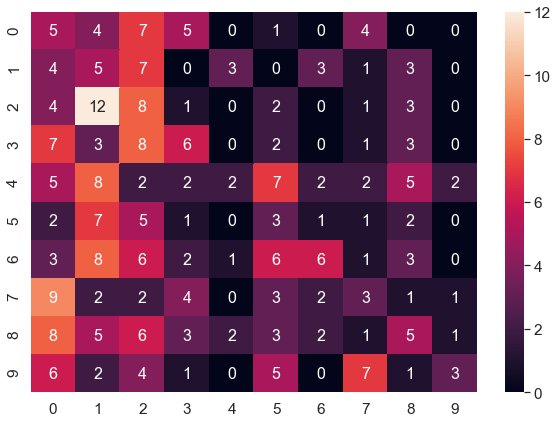

In [26]:
confusion_matrix_as_df = pd.DataFrame(confusion_matrix, range(10), range(10))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(confusion_matrix_as_df, annot=True, annot_kws={"size": 16}) # font size

plt.show()

## Features Importances

Feature: 0, Score: 0.02378
Feature: 1, Score: 0.02141
Feature: 2, Score: 0.03134
Feature: 3, Score: 0.02944
Feature: 4, Score: 0.02066
Feature: 5, Score: 0.02139
Feature: 6, Score: 0.01812
Feature: 7, Score: 0.02221
Feature: 8, Score: 0.02566
Feature: 9, Score: 0.02137
Feature: 10, Score: 0.02544
Feature: 11, Score: 0.01942
Feature: 12, Score: 0.02837
Feature: 13, Score: 0.02521
Feature: 14, Score: 0.02613
Feature: 15, Score: 0.02448
Feature: 16, Score: 0.01923
Feature: 17, Score: 0.02192
Feature: 18, Score: 0.02344
Feature: 19, Score: 0.02310
Feature: 20, Score: 0.01923
Feature: 21, Score: 0.01794
Feature: 22, Score: 0.01947
Feature: 23, Score: 0.01892
Feature: 24, Score: 0.02042
Feature: 25, Score: 0.02086
Feature: 26, Score: 0.01923
Feature: 27, Score: 0.02474
Feature: 28, Score: 0.01772
Feature: 29, Score: 0.02109
Feature: 30, Score: 0.02332
Feature: 31, Score: 0.02025
Feature: 32, Score: 0.02424
Feature: 33, Score: 0.02306
Feature: 34, Score: 0.02496
Feature: 35, Score: 0.02237
Fe

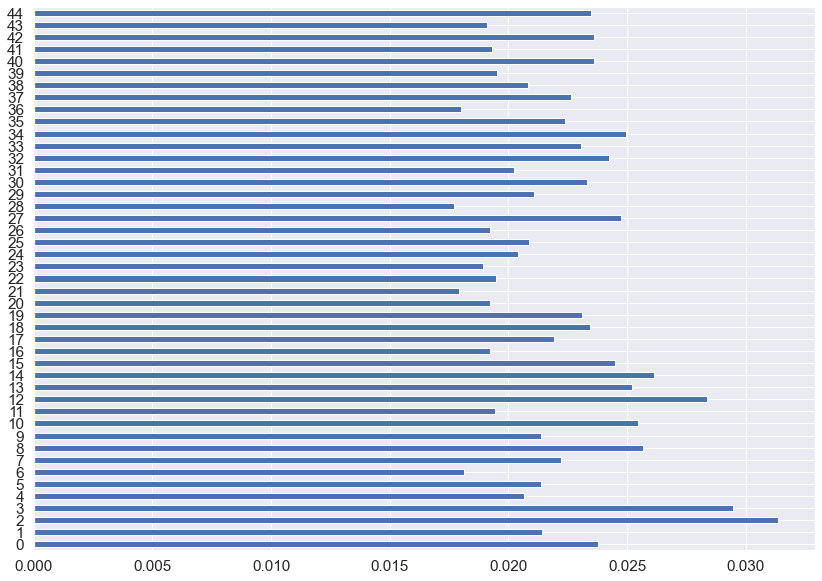

In [28]:
importances = RandomForest_clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importances):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
pd.Series(importances).plot(kind='barh' , figsize=(14, 10))

